1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [83]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [84]:
X, y = load_diabetes(return_X_y=True)

In [85]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [86]:
def gb_predict(X, trees_list, coef_list, eta):

    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [87]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [88]:
def bias(y, z):
    return (y - z)

In [89]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    trees = []
    
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:

            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:

            target = gb_predict(X_train, trees, coefs, eta)
            
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees[-1], train_errors[-1], test_errors[-1]

In [90]:
eta = 0.1

n_trees_array = [i for i in range(1, 15, 1)]

train_n_trees_error_array = []
test_n_trees_error_array = []

for n_trees in n_trees_array:
        
    coefs = [1] * n_trees
    max_depth = 5

    tr, train_error, test_error = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_n_trees_error_array.append(train_error)
    test_n_trees_error_array.append(test_error)

In [91]:
def get_n_trees_error_plot(n_trees_array, train_err, test_err):
    plt.xlabel('Trees number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees_array[-1])
    plt.plot(n_trees_array, train_err, label='train error')
    plt.plot(n_trees_array, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

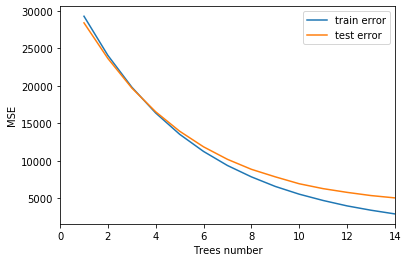

In [92]:
get_n_trees_error_plot(n_trees_array, train_n_trees_error_array, test_n_trees_error_array)

In [93]:
train_max_depth_error_array = []
test_max_depth_error_array = []

max_depth_array = [i for i in range(1, 5, 1)]

for max_depth in max_depth_array:

    n_trees = 15
    coefs = [1] * n_trees

    tr, train_error, test_error = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_max_depth_error_array.append(train_error)
    test_max_depth_error_array.append(test_error)

In [94]:
def get_depth_error_plot(max_depth_array, train_err, test_err):
    plt.xlabel('Max depth')
    plt.ylabel('MSE')
    plt.xlim(0, max_depth_array[-1])
    plt.plot(max_depth_array, train_err, label='train error')
    plt.plot(max_depth_array, test_err, label='test error')
    plt.legend(loc='upper left')
    plt.show()

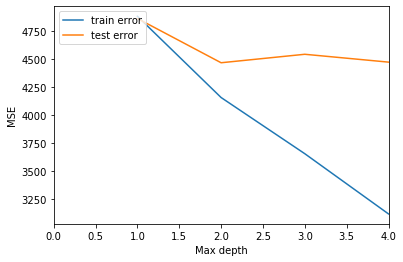

In [95]:
get_depth_error_plot(max_depth_array, train_max_depth_error_array, test_max_depth_error_array)